In [1]:
from lab import logger, util
from lab import analytics

In [2]:
a = analytics.Analyzer('mnist_loop')

In [4]:
a.load_tensorboard()

In [8]:
a.event_acc.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': [],
 'distributions': [],
 'tensors': ['train_loss',
  'train_loss/mean',
  'model/conv1/weight',
  'model/conv1/weight/mean',
  'model/conv1/weight/grad',
  'model/conv1/weight/grad/mean',
  'model/conv1/bias',
  'model/conv1/bias/mean',
  'model/conv1/bias/grad',
  'model/conv1/bias/grad/mean',
  'model/conv2/weight',
  'model/conv2/weight/mean',
  'model/conv2/weight/grad',
  'model/conv2/weight/grad/mean',
  'model/conv2/bias',
  'model/conv2/bias/mean',
  'model/conv2/bias/grad',
  'model/conv2/bias/grad/mean',
  'model/fc1/weight',
  'model/fc1/weight/mean',
  'model/fc1/weight/grad',
  'model/fc1/weight/grad/mean',
  'model/fc1/bias',
  'model/fc1/bias/mean',
  'model/fc1/bias/grad',
  'model/fc1/bias/grad/mean',
  'model/fc2/weight',
  'model/fc2/weight/mean',
  'model/fc2/weight/grad',
  'model/fc2/weight/grad/mean',
  'model/fc2/bias',
  'model/fc2/bias/mean',
  'model/fc2/bias/grad',
  'model/fc2/bias/grad/mean',
  

In [10]:
logger.info(a.tensor())

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
e = a.tensor('accuracy/mean')[0]

In [28]:
e

TensorEvent(wall_time=1578115164.843276, step=938, tensor_proto=dtype: DT_FLOAT
tensor_shape {
}
tensor_content: "\007_x?"
)

In [35]:
import tensorflow as tf

In [36]:
tf.make_ndarray(e.tensor_proto)

array(0.9702, dtype=float32)

In [49]:
tf.make_ndarray(a.tensor('model/conv2/bias')[0].tensor_proto)

array([[-4.70585525e-02, -4.41074430e-02,  2.00000000e+00],
       [-4.41074430e-02, -4.11563334e-02,  1.00000000e+00],
       [-4.11563334e-02, -3.82052239e-02,  1.00000000e+00],
       [-3.82052239e-02, -3.52541144e-02,  0.00000000e+00],
       [-3.52541144e-02, -3.23030048e-02,  2.00000000e+00],
       [-3.23030048e-02, -2.93518953e-02,  0.00000000e+00],
       [-2.93518953e-02, -2.64007858e-02,  1.00000000e+00],
       [-2.64007858e-02, -2.34496762e-02,  0.00000000e+00],
       [-2.34496762e-02, -2.04985667e-02,  1.00000000e+00],
       [-2.04985667e-02, -1.75474572e-02,  3.00000000e+00],
       [-1.75474572e-02, -1.45963476e-02,  2.00000000e+00],
       [-1.45963476e-02, -1.16452381e-02,  4.00000000e+00],
       [-1.16452381e-02, -8.69412857e-03,  1.00000000e+00],
       [-8.69412857e-03, -5.74301903e-03,  2.00000000e+00],
       [-5.74301903e-03, -2.79190950e-03,  2.00000000e+00],
       [-2.79190950e-03,  1.59200033e-04,  2.00000000e+00],
       [ 1.59200033e-04,  3.11030957e-03

In [48]:
a.tensor('train_loss')[2]

TensorEvent(wall_time=1578115126.043051, step=241, tensor_proto=dtype: DT_DOUBLE
tensor_shape {
  dim {
    size: 30
  }
  dim {
    size: 3
  }
}
tensor_content: "\000\000\000\300\245\016\305?\357\356\356.UA\306?\000\000\000\000\000\000\000@\357\356\356.UA\306?\336\335\335\235\004t\307?\000\000\000\000\000\000\000\000\336\335\335\235\004t\307?\315\314\314\014\264\246\310?\000\000\000\000\000\000\000\000\315\314\314\014\264\246\310?\274\273\273{c\331\311?\000\000\000\000\000\000\360?\274\273\273{c\331\311?\253\252\252\352\022\014\313?\000\000\000\000\000\000\000\000\253\252\252\352\022\014\313?\232\231\231Y\302>\314?\000\000\000\000\000\000\000\000\232\231\231Y\302>\314?\210\210\210\310qq\315?\000\000\000\000\000\000\000\000\210\210\210\310qq\315?xww7!\244\316?\000\000\000\000\000\000\360?xww7!\244\316?fff\246\320\326\317?\000\000\000\000\000\000\020@fff\246\320\326\317?\253\252\252\n\300\204\320?\000\000\000\000\000\000\000@\253\252\252\n\300\204\320?\"\"\"\302\027\036\321?\000\000\00

KeyError: 'Key test_loss was not found in Reservoir'

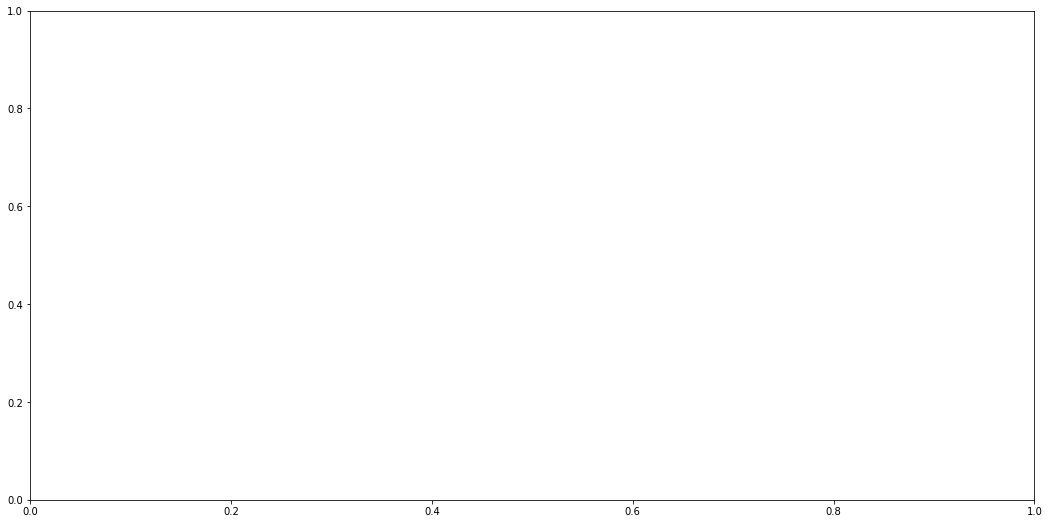

In [19]:
_, ax = plt.subplots(figsize=(18,9))

ln1 = a.render_scalar('test_loss', ax, sns.color_palette()[0])
ax2 = plt.twinx()
ln2 = a.render_histogram('accuracy', ax2, sns.color_palette()[1], levels=2)
# ax.set_ylim(-0.005, 0.05)
# ax2.set_ylim(-1, 10)
ax.set_title("Rewards and intrinsic reward")
ax.set_xlabel("time step")
ax.set_ylabel("reward")

In [3]:
analytics.get_lab()

<Lab path=/Users/varuna/ml/lab3>

In [4]:
run_info = analytics.get_run_info('mnist_loop')

In [5]:
import sqlite3

In [6]:
conn = sqlite3.connect(str(run_info.sqlite_path))


In [7]:
cur = conn.execute('SELECT MAX(step) FROM scalars')

In [8]:
for c in cur:
    print(c)

(1069,)


In [9]:
cur = conn.execute('''SELECT a.* FROM scalars AS a
            INNER JOIN (
                SELECT indicator, MAX(step) AS step 
                FROM scalars
                GROUP BY indicator
            ) b ON a.indicator = b.indicator AND a.step = b.step''')

In [10]:
for c in cur:
    print(c)

('model.conv1.weight.mean', 938, 0.017297202721238136)
('model.conv1.weight.grad.mean', 938, 0.003940716851502657)
('model.conv1.bias.mean', 938, 0.013700555078685284)
('model.conv1.bias.grad.mean', 938, 0.003084353869780898)
('model.conv2.weight.mean', 938, 0.0003597914183046669)
('model.conv2.weight.grad.mean', 938, 0.0005258394521661103)
('model.conv2.bias.mean', 938, 0.005607823841273785)
('model.conv2.bias.grad.mean', 938, -0.00011855472985189408)
('model.fc1.weight.mean', 938, 0.0001462755462853238)
('model.fc1.weight.grad.mean', 938, 7.55108121666126e-05)
('model.fc1.bias.mean', 938, 0.0014264597557485104)
('model.fc1.bias.grad.mean', 938, 4.218413960188627e-05)
('model.fc2.weight.mean', 938, -0.00024156631843652576)
('model.fc2.weight.grad.mean', 938, -1.7166137400437265e-09)
('model.fc2.bias.mean', 938, -0.0009683702373877168)
('model.fc2.bias.grad.mean', 938, -2.2351742678949904e-09)
('test_loss.mean', 938, 0.10482116966247558)
('accuracy.mean', 938, 0.9702)
('train_loss.mean

In [11]:
class F:
    def __dir__(self):
        return ['a', 'b']

In [12]:
with open(str(run_info.indicators_path), 'r') as f:
    print(util.yaml_load(f.read()))

{'accuracy': {'class_name': 'Histogram', 'name': 'accuracy'}, 'model.conv1.bias': {'class_name': 'Histogram', 'name': 'model.conv1.bias'}, 'model.conv1.bias.grad': {'class_name': 'Histogram', 'name': 'model.conv1.bias.grad'}, 'model.conv1.weight': {'class_name': 'Histogram', 'name': 'model.conv1.weight'}, 'model.conv1.weight.grad': {'class_name': 'Histogram', 'name': 'model.conv1.weight.grad'}, 'model.conv2.bias': {'class_name': 'Histogram', 'name': 'model.conv2.bias'}, 'model.conv2.bias.grad': {'class_name': 'Histogram', 'name': 'model.conv2.bias.grad'}, 'model.conv2.weight': {'class_name': 'Histogram', 'name': 'model.conv2.weight'}, 'model.conv2.weight.grad': {'class_name': 'Histogram', 'name': 'model.conv2.weight.grad'}, 'model.fc1.bias': {'class_name': 'Histogram', 'name': 'model.fc1.bias'}, 'model.fc1.bias.grad': {'class_name': 'Histogram', 'name': 'model.fc1.bias.grad'}, 'model.fc1.weight': {'class_name': 'Histogram', 'name': 'model.fc1.weight'}, 'model.fc1.weight.grad': {'class_